In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
datos_ordenamiento2 = pd.read_csv('../scaleup_ordenamiento2.csv')
datos_ordenamiento3 = pd.read_csv('../scaleup_ordenamiento3.csv')
datos_ordenamiento_clase = pd.read_csv('../scaleup_ordenamiento_clase.csv')

longitud_cadena1 = datos_ordenamiento_clase['longitud_cadena']
tiempo1 = datos_ordenamiento_clase['tiempo']

longitud_cadena2 =datos_ordenamiento2['longitud_cadena']
tiempo2 = datos_ordenamiento2['tiempo']

longitud_cadena3 =datos_ordenamiento3['longitud_cadena']
tiempo3 = datos_ordenamiento3['tiempo']
datos_ordenamiento_clase

,longitud_cadena,tiempo
0,100000,88.907068
1,150000,198.695277
2,200000,346.481413
3,250000,542.140576
4,300000,781.554359


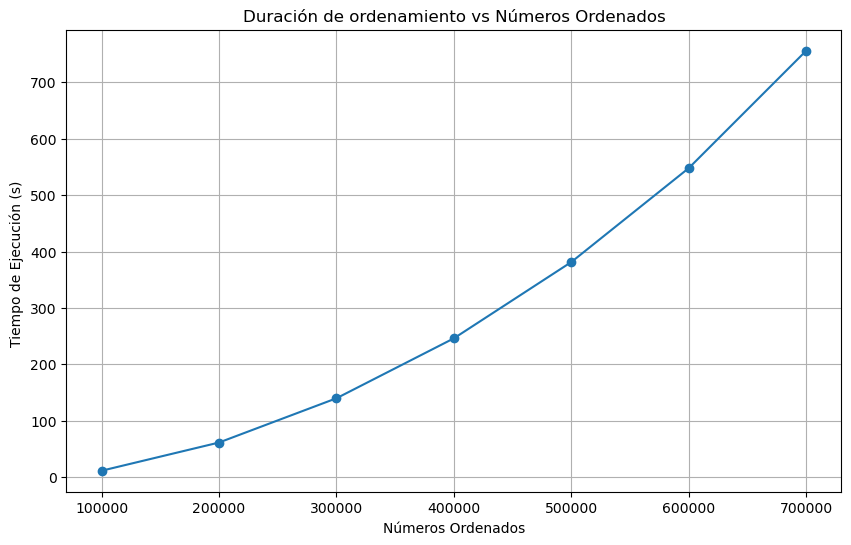

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(longitud_cadena2, tiempo2, marker='o')

# Añadir títulos y etiquetas
plt.title('Duración de ordenamiento vs Números Ordenados')
plt.xlabel('Números Ordenados')
plt.ylabel('Tiempo de Ejecución (s) ')

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [7]:
# Ajuste cuadrático
coeficientes2 = np.polyfit(longitud_cadena2, tiempo2, 2)
coeficientes3 = np.polyfit(longitud_cadena3, tiempo3, 2)

coeficientes1 = np.polyfit(longitud_cadena1, tiempo1, 2)

polinomio2 = np.poly1d(coeficientes2)
polinomio3 = np.poly1d(coeficientes3)

polinomio1 = np.poly1d(coeficientes1)

tiempo_ajustado1 = polinomio1(longitud_cadena1)
tiempo_ajustado2 = polinomio2(longitud_cadena2)
tiempo_ajustado3 = polinomio3(longitud_cadena3) 

Los coeficientes son[ 1.53462656e-09  4.10356298e-06 -2.33119071e+00]:
Error cuadratico medio de ordenamiento1: 1.2222709663794582
R² de ordenamiento 1: 0.9999800019663667
Error cuadratico medio de ordenamiento2: 7.824395350955377
R² de ordenamiento 2: 0.9998768347909737
Error cuadratico medio de ordenamiento3: 236.18878994282997
R² de ordenamiento 3: 0.9937808653884235


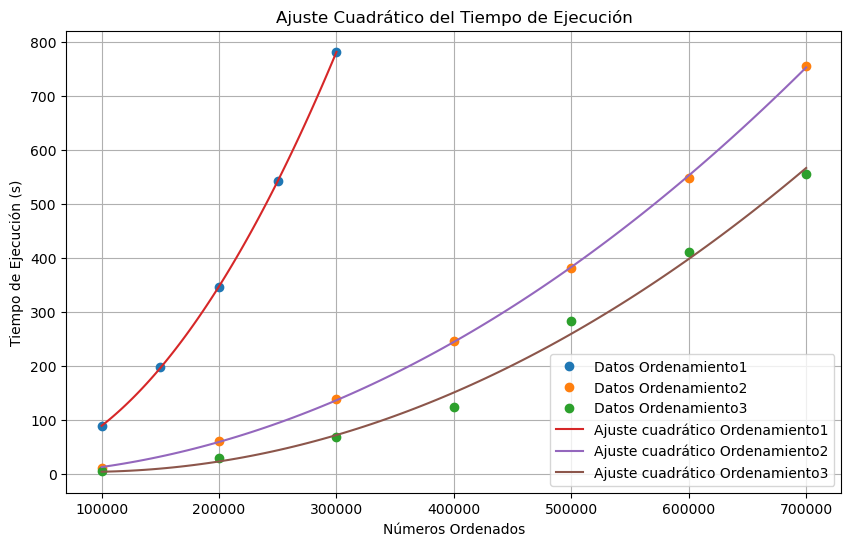

In [9]:
# Generar valores para la curva ajustada
x_fit2 = np.linspace(longitud_cadena2.min(), longitud_cadena2.max(), 100)
y_fit2 = polinomio2(x_fit2)

x_fit1= np.linspace(longitud_cadena1.min(), longitud_cadena1.max(), 100)
y_fit1=polinomio1(x_fit1)

x_fit3 = np.linspace(longitud_cadena3.min(), longitud_cadena3.max(), 100)
y_fit3 = polinomio3(x_fit3)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(longitud_cadena1, tiempo1, 'o', label='Datos Ordenamiento1')
plt.plot(longitud_cadena2, tiempo2, 'o', label='Datos Ordenamiento2')
plt.plot(longitud_cadena3, tiempo3, 'o', label='Datos Ordenamiento3')

plt.plot(x_fit1, y_fit1, '-', label='Ajuste cuadrático Ordenamiento1')
plt.plot(x_fit2, y_fit2, '-', label='Ajuste cuadrático Ordenamiento2')
plt.plot(x_fit3, y_fit3, '-', label='Ajuste cuadrático Ordenamiento3')

plt.title('Ajuste Cuadrático del Tiempo de Ejecución')
plt.xlabel('Números Ordenados')
plt.ylabel('Tiempo de Ejecución (s)')
plt.legend()
plt.grid(True)

print(f'Los coeficientes son{coeficientes2}:')

mse_1 = mean_squared_error(tiempo1, tiempo_ajustado1)
r2_1 = r2_score(tiempo1, tiempo_ajustado1)

mse_2 = mean_squared_error(tiempo2, tiempo_ajustado2)
r2_2 = r2_score(tiempo2, tiempo_ajustado2)

mse_3 = mean_squared_error(tiempo3, tiempo_ajustado3)
r2_3 = r2_score(tiempo3, tiempo_ajustado3)

print(f'Error cuadratico medio de ordenamiento1: {mse_1}')
print(f"R² de ordenamiento 1: {r2_1}")

print(f'Error cuadratico medio de ordenamiento2: {mse_2}')
print(f"R² de ordenamiento 2: {r2_2}")

print(f'Error cuadratico medio de ordenamiento3: {mse_3}')
print(f"R² de ordenamiento 3: {r2_3}")


In [6]:
print(f"Longitud de x_fit1: {len(x_fit1)}")
print(f"Longitud de y_fit1: {len(y_fit1)}")

Longitud de x_fit1: 100
Longitud de y_fit1: 101
